1.9.0
Epoch 1/100
50000/50000 [==============================] - 24s 474us/step - loss: 1.7067 - acc: 0.4742
Epoch 2/100
50000/50000 [==============================] - 22s 446us/step - loss: 1.0751 - acc: 0.6472
Epoch 3/100
50000/50000 [==============================] - 22s 446us/step - loss: 0.9080 - acc: 0.7033
Epoch 4/100
50000/50000 [==============================] - 22s 445us/step - loss: 0.8162 - acc: 0.7393
Epoch 5/100
50000/50000 [==============================] - 22s 447us/step - loss: 0.7421 - acc: 0.7673
Epoch 6/100
50000/50000 [==============================] - 22s 449us/step - loss: 0.6914 - acc: 0.78921s - loss: 0.6
Epoch 7/100
50000/50000 [==============================] - 23s 450us/step - loss: 0.6584 - acc: 0.8039
Epoch 8/100
50000/50000 [==============================] - 22s 448us/step - loss: 0.6264 - acc: 0.8169
Epoch 9/100
50000/50000 [==============================] - 22s 446us/step - loss: 0.6025 - acc: 0.8292
Epoch 10/100
50000/50000 [===========================

50000/50000 [==============================] - 23s 452us/step - loss: 0.4122 - acc: 0.9282
Epoch 79/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.4133 - acc: 0.9272
Epoch 80/100
50000/50000 [==============================] - 23s 452us/step - loss: 0.4114 - acc: 0.9285
Epoch 81/100
50000/50000 [==============================] - 23s 452us/step - loss: 0.4093 - acc: 0.9283
Epoch 82/100
50000/50000 [==============================] - 23s 452us/step - loss: 0.4044 - acc: 0.92931s - loss: 
Epoch 83/100
50000/50000 [==============================] - 23s 453us/step - loss: 0.4107 - acc: 0.9285
Epoch 84/100
50000/50000 [==============================] - 23s 451us/step - loss: 0.4024 - acc: 0.9310
Epoch 85/100
50000/50000 [==============================] - 23s 453us/step - loss: 0.4098 - acc: 0.9284
Epoch 86/100
50000/50000 [==============================] - 23s 452us/step - loss: 0.4026 - acc: 0.93201s - l
Epoch 87/100
50000/50000 [==============================] - 

3

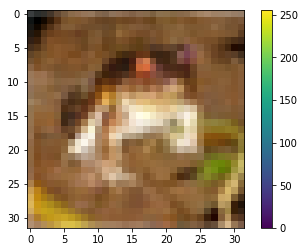

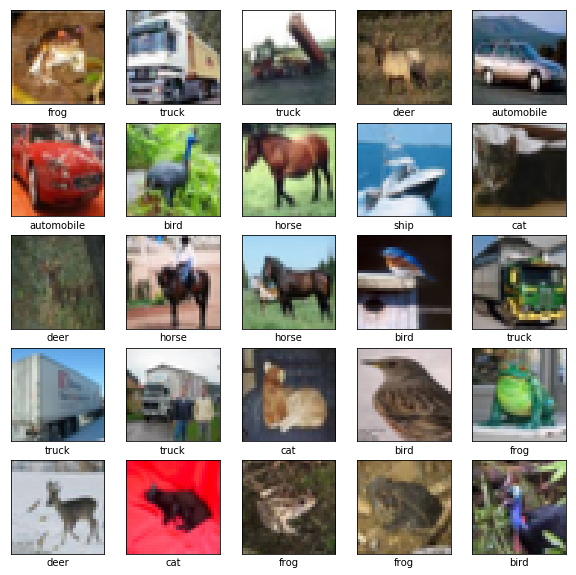

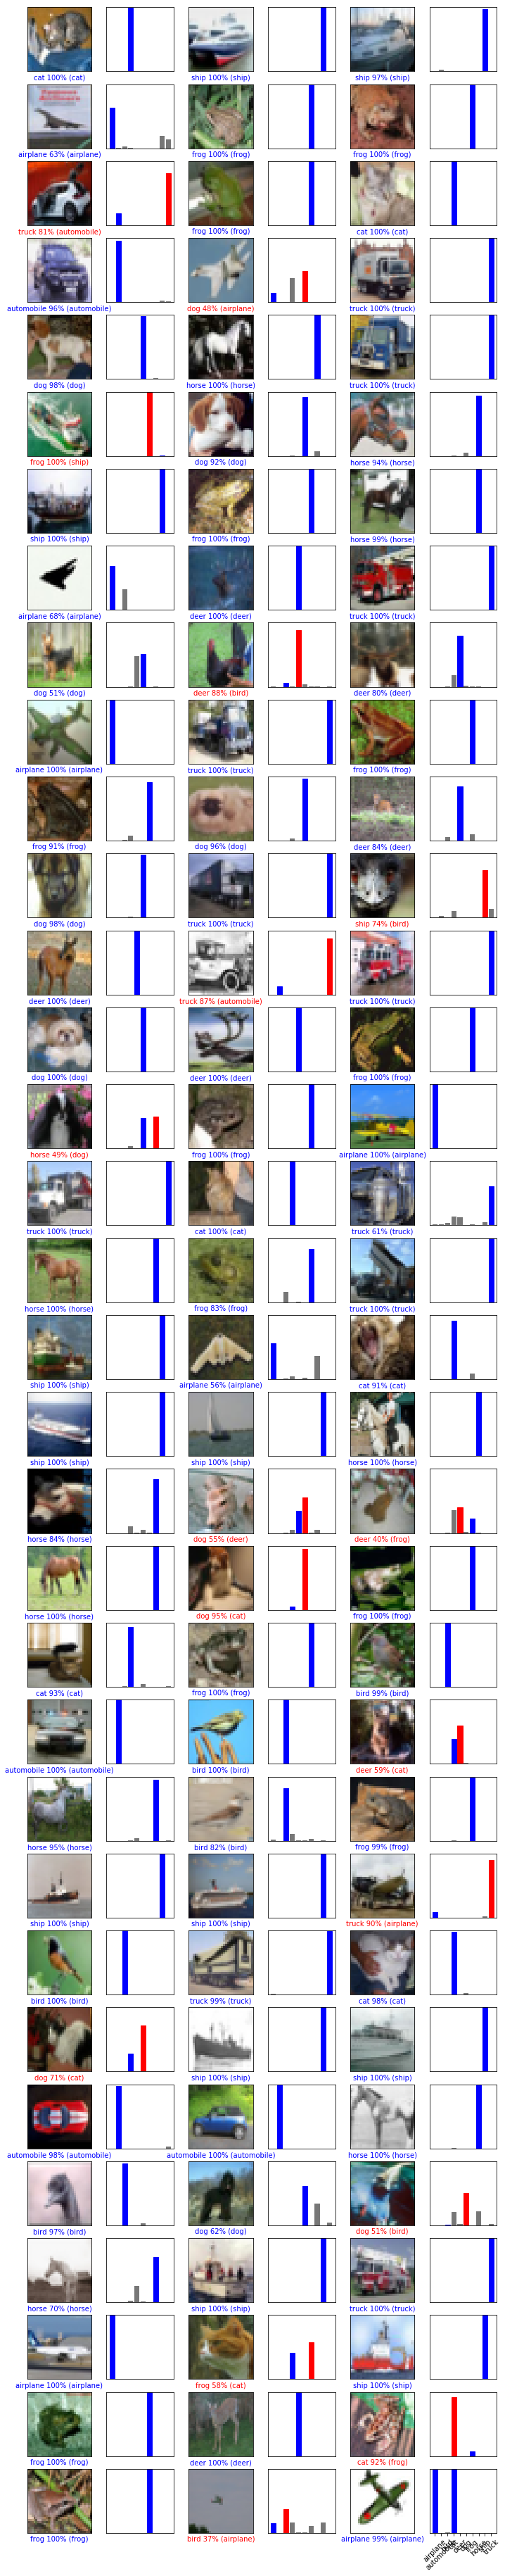

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras import initializers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator



# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

from keras.datasets import cifar10





(train_images,train_labelsss),(test_images,test_labels) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

train_labels=[]

for i in range(len(train_labelsss)):
    y = train_labelsss[i]
    x = y[0]
    train_labels.append(x)


train_images.shape
len(train_labels)
train_labels 
test_images.shape
len(test_labels)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    





model = keras.Sequential([
     
        
    keras.layers.Conv2D(32,(3,3), strides=(1, 1), padding='same',activation='elu',kernel_regularizer=regularizers.l2(1e-4) ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32,(3,3), strides=(1, 1), padding='same',activation='elu',kernel_regularizer=regularizers.l2(1e-4) ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2, noise_shape=None, seed=None),
    
    
    keras.layers.Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='elu',kernel_regularizer=regularizers.l2(1e-4) ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,(3,3), strides=(1, 1), padding='same',activation='elu',kernel_regularizer=regularizers.l2(1e-4) ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3, noise_shape=None, seed=None),
    
    
    keras.layers.Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='elu',kernel_regularizer=regularizers.l2(1e-4) ),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128,(3,3), strides=(1, 1), padding='same',activation='elu',kernel_regularizer=regularizers.l2(1e-4) ),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4, noise_shape=None, seed=None),
    
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    
])
    


            

model.compile(optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(train_images,train_labelsss,batch_size = 64,epochs=100)
 


model.save('cnn100epoch.h5')



test_loss, test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)



predictions = model.predict(test_images)


predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  y = true_label[0]
   
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[y]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array,true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  y = true_label[0]
  
  thisplot[predicted_label].set_color('red')
  thisplot[y].set_color('blue')
  
num_rows = 33
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
  
img = test_images[0]

print(img.shape)

img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])
